# Biến hóa với đồ thị dạng đường (line graph) với Matplotlib

[matplotlib](https://matplotlib.org/) là một thư viện vẽ biểu đồ mạnh mẽ và cơ bản đối với mỗi người sử dụng Python. Trong ví dụ này mình sẽ hướng dẫn các bạn biến hóa với đồ thị dạng đường như hình dưới đây:

![](gia_dien_sample.jpg)

Các phần tinh chỉnh gồm có:
- `title`: tiêu đề của biểu đồ
- `axes label`: nhãn của trục, gồm `xlabel` cho trục x và `ylabel` cho trục y
- thang đo trên mỗi trục gồm `tick` (vị trí) và `ticklabel` (nhãn)
- `legend`: bản chú thích
- màu sắc (`color`), kích thước (`linewidth`), kiểu của đường (`linestyle`)
- các đường ngang (`axhline`) và đứng (`axvline`) không phải lưới từ thang đo
- chú thích ở vị trí xác định của biểu đồ (`annotate`)

## Mở đầu
Để vẽ biểu đồ dạng đường trong matplotlib, ta chỉ cần đơn giản gọi hàm `plot` với một mảng các giá trị y là xong, trông như sau

In [1]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

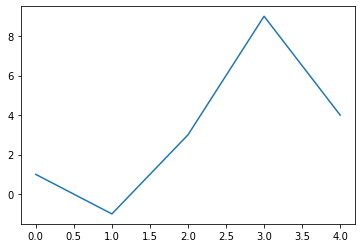

In [2]:
y = [1, -1, 3, 9, 4]
plt.plot(y);

Đồ thị trông rất đơn điệu và không có gì hấp dẫn, chỉ cho ta biết sự thay đổi của một biến y nào đó thôi.
Phần sau sẽ đi vào hướng dẫn vẽ đồ thị giá điện như trên

## Chuẩn bị

### Biểu giá điện
- Giá điện sinh hoạt đến 15-08-2020 từ [website của EVN](https://www.evn.com.vn/c3/evn-va-khach-hang/Bieu-gia-ban-le-dien-9-79.aspx):

<table align="center" border="1" cellpadding="0" cellspacing="1" style="width:300px">
    <colgroup>
       <col span="1" style="width: 7%;">
       <col span="1" style="width: 63%;">
       <col span="1" style="width: 30%;">
    </colgroup>
	<thead align="left">
		<tr>
			<th> <strong>TT</strong> </th>
			<th> <strong>Nhóm đối tượng khách hàng</strong> </th>
			<th> <strong>Giá bán điện (đồng/kWh)</strong> </th>
		</tr>
	</thead>
	<tbody>
		<tr>
			<td> 1 </td>
			<td> Giá bán lẻ điện sinh hoạt </td>
			<td> &nbsp; </td>
		</tr>
		<tr>
			<td> &nbsp; </td>
			<td> &nbsp;&nbsp;Bậc 1: Cho kWh từ 0 - 50 </td>
			<td> 1.678 </td>
		</tr>
		<tr>
			<td> &nbsp;</td>
            <td> &nbsp;&nbsp;Bậc 2: Cho kWh từ 51 - 100 </td>
			<td> 1.734 </td>
		</tr>
		<tr>
			<td> &nbsp; </td>
			<td> &nbsp;&nbsp;Bậc 3: Cho kWh từ 101 - 200 </td>
			<td> 2.014 </td>
		</tr>
		<tr>
			<td> &nbsp; </td>
			<td> &nbsp;&nbsp;Bậc 4: Cho kWh từ 201 - 300 </td>
			<td> 2.536 </td>
		</tr>
		<tr>
            <td> &nbsp; </td>
			<td> &nbsp;&nbsp;Bậc 5: Cho kWh từ 301 - 400 </td>
			<td> 2.834 </td>
		</tr>
		<tr>
			<td> &nbsp;</td>
			<td> &nbsp;&nbsp;Bậc 6: Cho kWh từ 401 trở lên </td>
			<td> 2.927 </td>
		</tr>
		<tr>
			<td> 2 </td>
			<td> Giá bán lẻ điện sinh hoạt <br> dùng công tơ thẻ trả trước </td>
			<td> 2.461 </td>
		</tr>
		<tr>
			<td> 3 </td>
			<td> Giá bán lẻ điện sinh hoạt <br>trung bình </td>
			<td> <strong>1.864</strong> </td>
		</tr>
	</tbody>
</table>

- [Các phương án được đề xuất](https://tuoitre.vn/thu-tinh-tien-dien-sinh-hoat-theo-2-phuong-an-vua-cong-bo-2020081122534107.htm):

<div>
   <h5 align="center">Phương &aacute;n 1</h5>
   <table>
      <thead>
         <tr>
            <th>Gi&aacute; b&aacute;n lẻ điện sinh hoạt</th>
            <th>Tỉ lệ so với mức gi&aacute; b&aacute;n lẻ <br> điện b&igrave;nh qu&acirc;n (%)</th>
            <th>Gi&aacute; điện (đồng/kWh)</th>
         </tr>
      </thead>
      <tbody>
         <tr>
            <td>Bậc 1: Cho kWh từ 0 - 100</td>
            <td>90%</td>
            <td>1.678</td>
         </tr>
         <tr>
            <td>Bậc 2: Cho kWh từ 101 - 200</td>
            <td>108%</td>
            <td>2.014</td>
         </tr>
         <tr>
            <td>Bậc 3: Cho kWh từ 201 - 400</td>
            <td>141%</td>
            <td>2.628</td>
         </tr>
         <tr>
            <td>Bậc 4: Cho kWh từ 401- 700</td>
            <td>160%</td>
            <td>2.983</td>
         </tr>
         <tr>
            <td>Bậc 5: Cho kWh từ 701 trở l&ecirc;n</td>
            <td>168%</td>
            <td>3.132</td>
         </tr>
      </tbody>
   </table>
</div>


<div>
   <h5 align="center">Phương &aacute;n 2A</h5>
   <table>
      <thead>
         <tr>
            <th>Gi&aacute; b&aacute;n lẻ điện sinh hoạt</th>
            <th>Tỉ lệ so với mức gi&aacute; b&aacute;n lẻ <br> điện b&igrave;nh qu&acirc;n (%)</th>
            <th>Gi&aacute; điện (đồng/kWh)</th>
         </tr>
      </thead>
      <tbody>
         <tr>
            <td colspan="3">1. Gi&aacute; b&aacute;n lẻ điện sinh hoạt 5 bậc</td>
         </tr>
         <tr>
            <td>Bậc 1: Cho kWh từ 0 - 100</td>
            <td>90%</td>
            <td>1.678</td>
         </tr>
         <tr>
            <td>Bậc 2: Cho kWh từ 101 - 200</td>
            <td>108%</td>
            <td>2.013</td>
         </tr>
         <tr>
            <td>Bậc 3: Cho kWh từ 201 - 400</td>
            <td>141%</td>
            <td>2.628</td>
         </tr>
         <tr>
            <td>Bậc 4: Cho kWh từ 401- 700</td>
            <td>160%</td>
            <td>2.983</td>
         </tr>
         <tr>
            <td>Bậc 5: Cho kWh từ 701 trở l&ecirc;n</td>
            <td>274%</td>
            <td>5.108</td>
         </tr>
         <tr>
            <td colspan="3">2. Gi&aacute; b&aacute;n lẻ điện một gi&aacute;</td>
         </tr>
         <tr>
            <td>Gi&aacute; b&aacute;n lẻ điện sinh hoạt cho <br> kh&aacute;ch h&agrave;ng lựa chọn một gi&aacute;</td>
            <td>145%</td>
            <td>2.703</td>
         </tr>
      </tbody>
   </table>
</div>

<div>
   <h5 align="center">Phương &aacute;n 2B</h5>
   <table>
      <thead>
         <tr>
            <th>Gi&aacute; b&aacute;n lẻ điện sinh hoạt</th>
            <th>Tỉ lệ so với mức gi&aacute; b&aacute;n lẻ <br> điện b&igrave;nh qu&acirc;n (%)</th>
            <th>Gi&aacute; điện (đồng/kWh)</th>
         </tr>
      </thead>
      <tbody>
         <tr>
            <td colspan="3">1. Gi&aacute; b&aacute;n lẻ điện sinh hoạt 5 bậc</td>
         </tr>
         <tr>
            <td>Bậc 1: Cho kWh từ 0 - 100</td>
            <td>90%</td>
            <td>1.678</td>
         </tr>
         <tr>
            <td>Bậc 2: Cho kWh từ 101 - 200</td>
            <td>108%</td>
            <td>2.013</td>
         </tr>
         <tr>
            <td>Bậc 3: Cho kWh từ 201 - 400</td>
            <td>141%</td>
            <td>2.628</td>
         </tr>
         <tr>
            <td>Bậc 4: Cho kWh từ 401- 700</td>
            <td>160%</td>
            <td>2.983</td>
         </tr>
         <tr>
            <td>Bậc 5: Cho kWh từ 701 trở l&ecirc;n</td>
            <td>185%</td>
            <td>3.449</td>
         </tr>
         <tr>
            <td colspan="3">2. Gi&aacute; b&aacute;n lẻ điện một gi&aacute;</td>
         </tr>
         <tr>
            <td>Gi&aacute; b&aacute;n lẻ điện sinh hoạt cho<br> kh&aacute;ch h&agrave;ng lựa chọn một gi&aacute;</td>
            <td>155%</td>
            <td>2.889</td>
         </tr>
      </tbody>
   </table>
</div>

**Gán cho các biến** 

các định mức giá điện sẽ được gán cho các biến dạng dictionary 

In [3]:
gia_dien_hien_tai = {
                        0: 1678, 
                        50: 1734, 
                        100: 2014, 
                        200: 2536, 
                        300: 2834, 
                        400: 2927
                    }
gia_dien_pa1 = {0: 1678, 100: 2014, 200: 2628, 400: 2983, 700: 3132}
gia_dien_pa2a = {0: 1678, 100: 2013, 200: 2628, 400: 2983, 700: 5108}
mot_gia_2a = 2703
gia_dien_pa2b = {0: 1678, 100: 2013, 200: 2628, 400: 2983, 700: 3449}
mot_gia_2b = 2889

### Hàm tính giá điện
#### Hàm tính toán bổ trợ

In [4]:
def dinh_muc_gia_dien(gia_dien=gia_dien_hien_tai):
    """
    Hàm này nhận đầu vào là biểu giá điện như trên và trả về 3 mảng
        - các mức tiêu thụ (keys)
        - giá mỗi kWh ở mức đó (values)
        - tổng cộng dồn ở mỗi mức
    """
    muc_tieu_thu = sorted(gia_dien)
    gia_moi_kWh = [value for key, value in sorted(gia_dien.items(), key=lambda x: x[0])]
    tien_theo_dinh_muc = [0]
    for i in range(1, len(muc_tieu_thu)):
        tien_theo_dinh_muc.append(tien_theo_dinh_muc[i-1] + (muc_tieu_thu[i] - muc_tieu_thu[i-1])*gia_moi_kWh[i-1])
    return np.array(muc_tieu_thu), np.array(gia_moi_kWh), np.array(tien_theo_dinh_muc)

Các giá trị bổ trợ cho phương án hiện tại

In [5]:
muc_tieu_thu_hien_tai, gia_moi_kWh_hien_tai, tien_theo_dinh_muc_hien_tai = dinh_muc_gia_dien(gia_dien_hien_tai)
muc_tieu_thu_hien_tai, gia_moi_kWh_hien_tai, tien_theo_dinh_muc_hien_tai

(array([  0,  50, 100, 200, 300, 400]),
 array([1678, 1734, 2014, 2536, 2834, 2927]),
 array([     0,  83900, 170600, 372000, 625600, 909000]))

#### Hàm xác định giá mỗi kWh ở lượng tiêu thụ

In [6]:
def gia_dien_kWh(so_kWh, gia_dien=gia_dien_hien_tai):
    """
    Hàm nhận vào số lượng tiêu thụ kWh và biểu giá điện
    Trả về số tiền phải trả cho mỗi kWh ở mức đó.
    """
    muc_tieu_thu = np.array(sorted(gia_dien))
    id_dinh_muc = np.where(so_kWh >= muc_tieu_thu)[0][-1]
    return gia_dien.get(muc_tieu_thu[id_dinh_muc], 0)

In [7]:
gia_dien_kWh(51), gia_dien_kWh(400)

(1734, 2927)

#### Tính tổng tiền điện và trung bình mỗi KWh

In [8]:
def tien_dien_tieu_thu(
    so_kWh, 
    gia_dien=gia_dien_hien_tai, 
    muc_tieu_thu=muc_tieu_thu_hien_tai, 
    gia_moi_kWh=gia_moi_kWh_hien_tai, 
    tien_theo_dinh_muc=tien_theo_dinh_muc_hien_tai
):
    """
    Hàm nhận vào số lượng kWh tiêu thụ và biểu giá điện
    Các tham số khác để bổ trợ tính toán nhanh
    Trả về tổng tiền phải trả
    """
    id_dinh_muc = np.where(so_kWh >= muc_tieu_thu)[0][-1]
    tien_dien = (so_kWh - muc_tieu_thu[id_dinh_muc])*gia_moi_kWh[id_dinh_muc] 
    tien_dien += tien_theo_dinh_muc[id_dinh_muc]
    return tien_dien

def tien_dien_trung_binh(
    so_kWh, 
    gia_dien=gia_dien_hien_tai, 
    muc_tieu_thu=muc_tieu_thu_hien_tai, 
    gia_moi_kWh=gia_moi_kWh_hien_tai, 
    tien_theo_dinh_muc=tien_theo_dinh_muc_hien_tai
):
    """
    Hàm nhận vào số lượng kWh tiêu thụ và biểu giá điện
    Các tham số khác để bổ trợ tính toán nhanh
    Trả về tổng tiền phải trả cho mỗi kWh
    """
    if so_kWh == 0:
        return gia_moi_kWh[0]
    else:
        tong_tien = tien_dien_tieu_thu(so_kWh, gia_dien, muc_tieu_thu, gia_moi_kWh, tien_theo_dinh_muc)
        return tong_tien/so_kWh

Các giá trị bổ trợ cho các phương án khác

In [9]:
muc_tieu_thu_pa1, gia_moi_kWh_pa1, tien_theo_dinh_muc_pa1 = dinh_muc_gia_dien(gia_dien_pa1)
muc_tieu_thu_pa2a, gia_moi_kWh_pa2a, tien_theo_dinh_muc_pa2a = dinh_muc_gia_dien(gia_dien_pa2a)
muc_tieu_thu_pa2b, gia_moi_kWh_pa2b, tien_theo_dinh_muc_pa2b = dinh_muc_gia_dien(gia_dien_pa2b)

In [10]:
muc_tieu_thu_pa2b, gia_moi_kWh_pa2a, tien_theo_dinh_muc_pa2b

(array([  0, 100, 200, 400, 700]),
 array([1678, 2013, 2628, 2983, 5108]),
 array([      0,  167800,  369100,  894700, 1789600]))

In [11]:
muc_tieu_thu_pa2b, gia_moi_kWh_pa2b, tien_theo_dinh_muc_pa2b

(array([  0, 100, 200, 400, 700]),
 array([1678, 2013, 2628, 2983, 3449]),
 array([      0,  167800,  369100,  894700, 1789600]))

### Dữ liệu vẽ biểu đồ

In [12]:
# số kWh
kWhs = list(range(1, 1230))

# mức giá mỗi kWh hiện tại
muc_gia_hien_tai = [gia_dien_kWh(kWh, gia_dien_hien_tai) for kWh in kWhs]

# trung bình phải trả cho mỗi kWh, hiện tại
trung_binh_hien_tai = [
    tien_dien_trung_binh(
        kWh, 
        gia_dien_hien_tai, 
        muc_tieu_thu_hien_tai, 
        gia_moi_kWh_hien_tai, 
        tien_theo_dinh_muc_hien_tai
    ) 
    for kWh in kWhs
]

# Mức giá và trung bình theo phương án 1
muc_gia_pa1 = [gia_dien_kWh(kWh, gia_dien_pa1) for kWh in kWhs]
trung_binh_pa1 = [
    tien_dien_trung_binh(kWh, gia_dien_pa1, muc_tieu_thu_pa1, gia_moi_kWh_pa1, tien_theo_dinh_muc_pa1)
    for kWh in kWhs
]

# Mức giá và trung bình theo phương án 2A
muc_gia_pa2a = [gia_dien_kWh(kWh, gia_dien_pa2a) for kWh in kWhs]
trung_binh_pa2a = [
    tien_dien_trung_binh(kWh, gia_dien_pa2a, muc_tieu_thu_pa2a, gia_moi_kWh_pa2a, tien_theo_dinh_muc_pa2a) 
    for kWh in kWhs
]

# Mức giá và trung bình theo phương án 2B
muc_gia_pa2b = [gia_dien_kWh(kWh, gia_dien_pa2b) for kWh in kWhs]
trung_binh_pa2b = [
    tien_dien_trung_binh(kWh, gia_dien_pa2b, muc_tieu_thu_pa2b, gia_moi_kWh_pa2b, tien_theo_dinh_muc_pa2b) 
    for kWh in kWhs
]

## Vẽ biểu đồ

- Tạo figure và Axes của figure đó
Thường ta có thể đơn giản dùng `pyplot.plot()` để vẽ rồi dùng module `pyplot` tinh chỉnh mọi thứ. 
Điều này rất tiện khi ta chỉ có một biểu đồ duy nhất. Khi phải vẽ nhiều biểu đồ và muốn tinh chỉnh
trên từng cái thì nên chuyển sang sử dụng module `matplotlib.axes.Axes`

#### Tạo figure và hệ trục 
Tạo và tinh chỉnh hệ trục
- **`plt.subplots(số_hệ_trục, số_hệ_trục, các_thông_số_khác)`**
- **`ax.set_title(tiêu_đề, thông_số_tiêu_đề)`**
- **`ax.set_xlabel(nhãn, thông_số_nhãn)`**
- **`ax.set_title(nhãn, thông_số_nhãn)`**

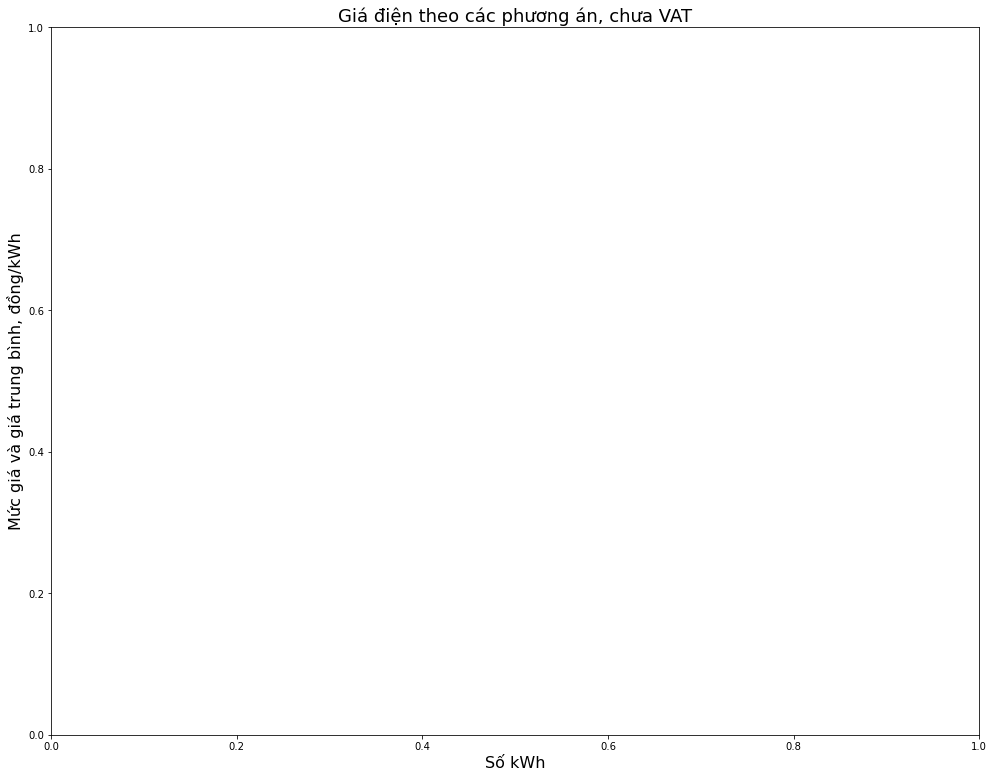

In [13]:
# tạo figure có kích thước rộng 15 cao 12
# chỉ có một hệ trục duy nhất
fig, ax = plt.subplots(1, 1, figsize=(15, 12))

# chỉnh tiêu đề, có nhiều tham số để chỉnh hơn nữa, hãy thử
ax.set_title('Giá điện theo các phương án, chưa VAT', fontsize=18)
# chỉnh tên trục x
ax.set_xlabel('Số kWh', fontsize=16)
# chỉnh tên trục y
ax.set_ylabel('Mức giá và giá trung bình, đồng/kWh', fontsize=16);
plt.tight_layout(pad=5); # loại bỏ phần dư thừa

#### vẽ các mức giá và gía trung bình

**`ax.plot(mảng_x, mảng_y, các tham số điều chỉnh khác)`**:
- `label`: tên của đường, sẽ hiển thị khi gọi chú thích `ax.legend`
- `ls` hay `linestyle`: kiểu đường, có 4 kiểu đường cơ bản là chấm chấm `:`, nét liền `-`, nét đứt `--`, nét đứt chấm `-.`. Để đơn giản ở đây các mức giác bậc thang dùng nét liền, các đường giá trung bình dùng nét đứt. Nét đứt có thể được điểu chỉnh bởi `line.set_dashes([])` nhưng ở đây dùng giá trị mặc định
- `lw` hay `linewidth`: độ dày của nét, nét liền = mặc định, nét đứt = 2
- `color`: sử dụng bảng màu cơ bản sau

![](matplotlib-colors-default-property-cycle.png)

- dùng `C0` cho phương án hiện tại, `C1` cho phương án 1, `C2` và `C3` cho phương án 2
    

In [14]:
ax.plot(kWhs, muc_gia_hien_tai, label='Mức giá hiện tại', ls='-', color='C0');
ax.plot(kWhs, trung_binh_hien_tai, label="Trung bình hiện tại", ls='--', color='C0', lw=2);

ax.plot(kWhs, muc_gia_pa1, label='Mức giá PA1', ls='-', color='C1');
ax.plot(kWhs, trung_binh_pa1, label="Trung bình PA1", ls='--', color='C1', lw=2);

ax.plot(kWhs, muc_gia_pa2a, label='Mức giá PA 2A', ls='-', color='C2');
ax.plot(kWhs, trung_binh_pa2a, label="Trung bình PA 2A", ls='--', color='C2', lw=2);

ax.plot(kWhs, muc_gia_pa2b, label='Mức giá PA 2B', ls='-', color='C3');
ax.plot(kWhs, trung_binh_pa2b, label="Trung bình PA 2B", ls='--', color='C3', lw=2);

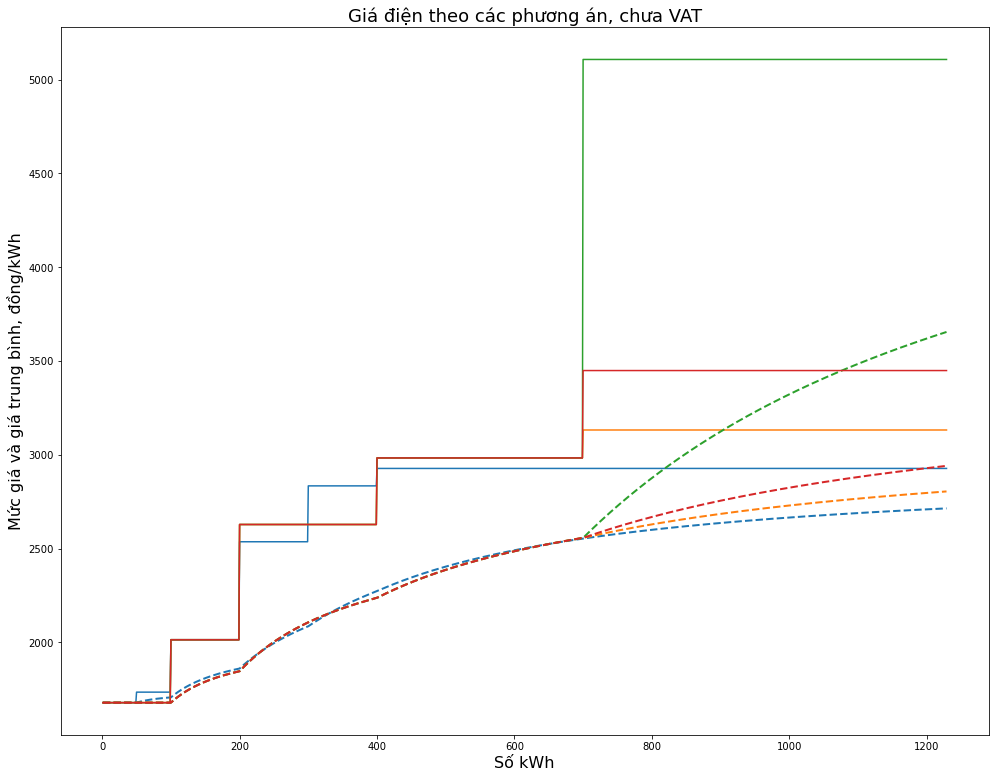

In [15]:
fig

**thêm các đường ngang**
- **`ax.axhline(vị_trí, các thông số điều chỉnh khác cho kiểu line)`**

In [16]:
# chú ý dùng màu cho đồng bộ
ax.axhline(y=mot_gia_2a, color='C2', lw=2, ls=':')
ax.axhline(y=mot_gia_2b, color='C3', lw=2, ls=':');

**các đường đứng**

- **`ax.axvline(vị_trí, các thông số điều chỉnh khác cho kiểu line)`**

In [17]:
for muc in {**gia_dien_hien_tai, **gia_dien_pa1}:
    ax.axvline(muc, color='k', alpha=0.3, lw=0.5);
# alpha chỉ độ trong suốt, như A trong RGBA của ảnh PNG

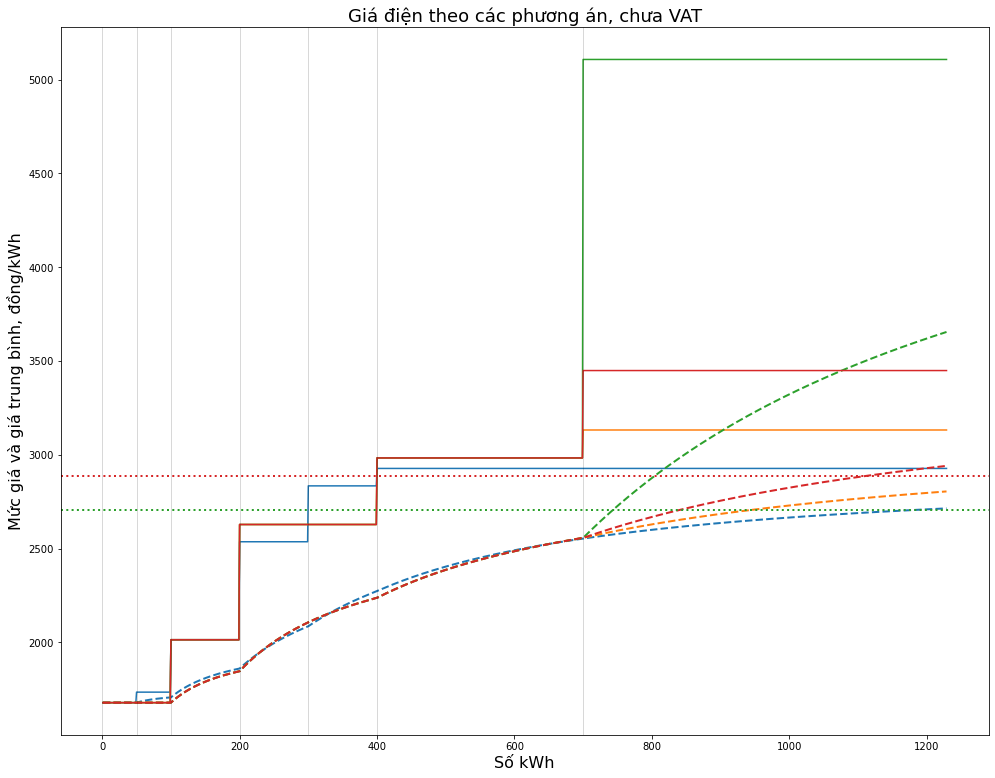

In [18]:
fig

**thêm các số chú thích**
- **`ax.annotate(text, vị_trí_xy)`**

In [19]:
# chú thích cho các mức giá cố định
# dùng dấu . thể hiện cho nhóm 3 chữ số
mot_gia_2a_ = "{:.3f}".format(mot_gia_2a/1000)
ax.annotate(
    s=f"PA 2A một giá: {mot_gia_2a_}", 
    xy=(0, mot_gia_2a+20), 
    color='C2', fontsize=14
)
mot_gia_2b_ = "{:.3f}".format(mot_gia_2b/1000)
ax.annotate(
    s=f"PA 2B một giá: {mot_gia_2b_}", 
    xy=(0, mot_gia_2b+20), 
    color='C3', fontsize=14
)

# giá bậc thang hiện tại
for muc in gia_dien_hien_tai:    
    if muc not in (200, 400):
        ax.annotate(
            s="{:.3f}".format(gia_dien_hien_tai[muc]/1000), 
            xy=(muc+5, gia_dien_hien_tai[muc]+20), 
            color='C0', fontsize=14
        )
    else:
        ax.annotate(
            s="{:.3f}".format(gia_dien_hien_tai[muc]/1000),
            xy=(muc+5, gia_dien_hien_tai[muc]-70), 
            color='C0', fontsize=14
        )
# giá bậc thang phương án 1    
for muc in gia_dien_pa1:
    ax.annotate(
        s="{:.3f}".format(gia_dien_pa1[muc]/1000), 
        xy=(muc+5, gia_dien_pa1[muc]+20), 
        color='C1', fontsize=14
    )

# giá bậc thang phương án 2A và 2B    
ax.annotate(
    s="{:.3f}".format(gia_moi_kWh_pa2a[-1]/1000), 
    xy=(muc_tieu_thu_pa2a[-1]+5, gia_moi_kWh_pa2a[-1]+20), 
    color='C2', fontsize=14
)    
ax.annotate(
    s="{:.3f}".format(gia_moi_kWh_pa2b[-1]/1000), 
    xy=(muc_tieu_thu_pa2b[-1]+5, gia_moi_kWh_pa2b[-1]+20), 
    color='C3', fontsize=14
);

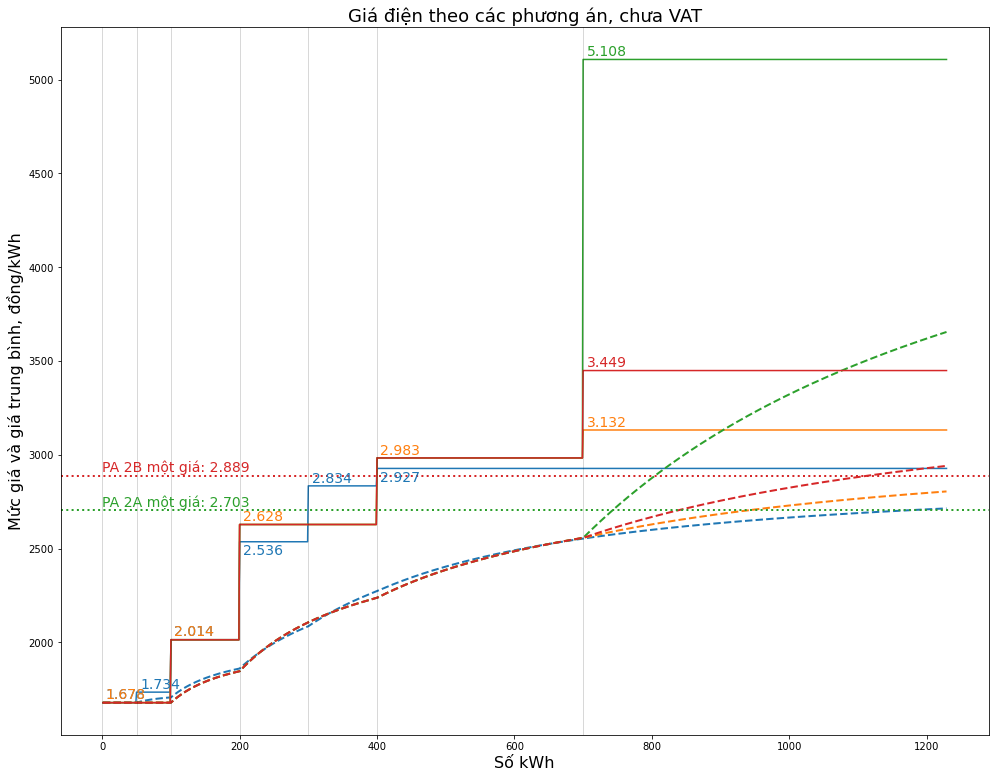

In [20]:
fig

**thêm bảng chú thích**

In [21]:
ax.legend(loc='upper right', fontsize=14);

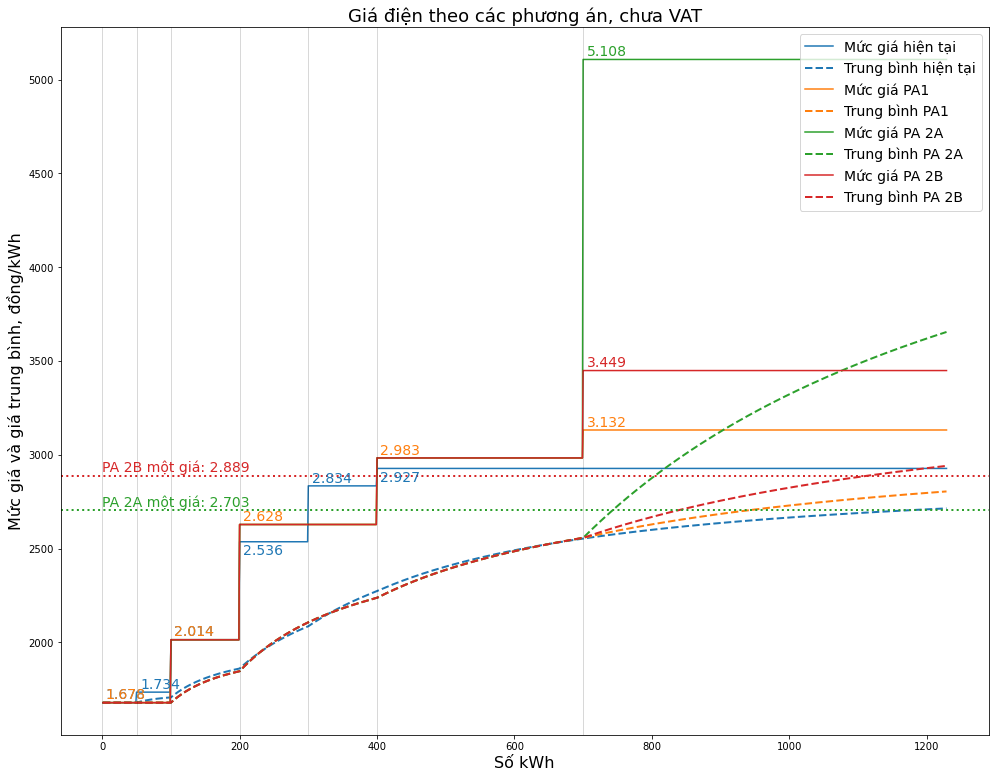

In [22]:
fig

**chỉnh các số trên trục**

- **`ax.set_xticklabels(labels, tham_số_khác)`**
- **`ax.set_yticklabels(labels, tham_số_khác)`**

In [23]:
# trục ngang
xticklabels = [text.get_text().replace('−', '-') for text in  ax.get_xticklabels()]
# định dạng phần nghìn = `.` kiểu Việt Nam thay cho `,`
xticklabels = ["{:,.0f}".format(float(text)).replace(',', '.') for text in xticklabels]
ax.set_xticklabels(labels=xticklabels, fontsize=12)

# trục dọc
yticklabels = [text.get_text() for text in  ax.get_yticklabels()]
# định dạng phần nghìn = `.` kiểu Việt Nam thay cho `,`
yticklabels = ["{:,.0f}".format(float(text)).replace(',', '.') for text in yticklabels]
ax.set_yticklabels(labels=yticklabels, fontsize=12);

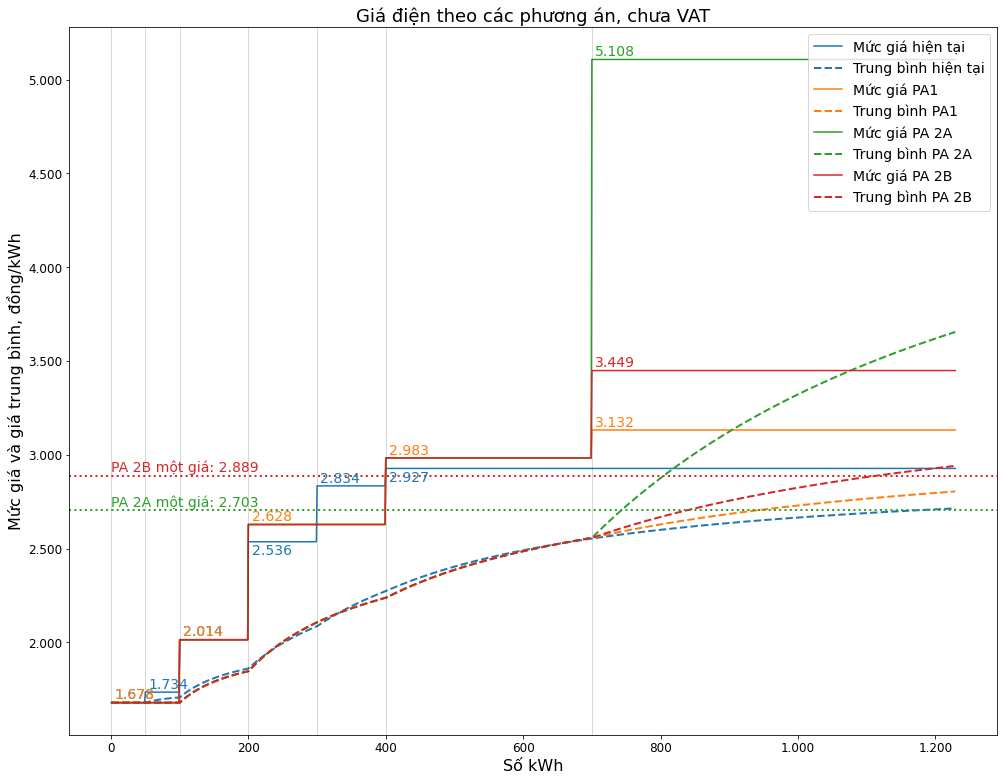

In [24]:
fig

**lưu biểu đồ thành file ảnh**

In [25]:
fig.savefig('gia_dien.png', dpi=100);

### Biểu đồ tiền điện phải trả

#### Dữ liệu

In [26]:
kWhs = range(1, 1201)
# Hiện tại
hien_tai = [
    tien_dien_tieu_thu(kWh, gia_dien_hien_tai, muc_tieu_thu_hien_tai, gia_moi_kWh_hien_tai, tien_theo_dinh_muc_hien_tai)/1e6 
    for kWh in kWhs
]
# Theo phương án 1
pa1 = [
    tien_dien_tieu_thu(kWh, gia_dien_pa1, muc_tieu_thu_pa1, gia_moi_kWh_pa1, tien_theo_dinh_muc_pa1)/1e6 
    for kWh in kWhs
]
# Theo phương án 2A
pa2a = [
    tien_dien_tieu_thu(kWh, gia_dien_pa2a, muc_tieu_thu_pa2a, gia_moi_kWh_pa2a, tien_theo_dinh_muc_pa2a)/1e6 
    for kWh in kWhs
]
# Theo phương án 2A một giá
pa2a_1 = [kWh*mot_gia_2a/1e6 for kWh in kWhs]
# Theo phương án 2B
pa2b = [
    tien_dien_tieu_thu(kWh, gia_dien_pa2b, muc_tieu_thu_pa2b, gia_moi_kWh_pa2b, tien_theo_dinh_muc_pa2b)/1e6 
    for kWh in kWhs
]
# Theo phương án 2B một giá
pa2b_1 = [kWh*mot_gia_2b/1e6 for kWh in kWhs]

#### Biểu đồ

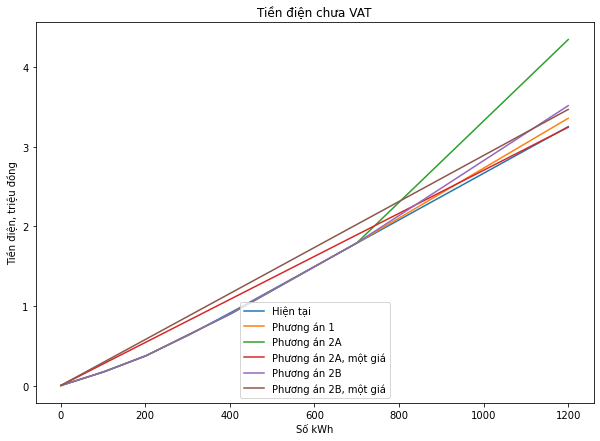

In [27]:
fig, ax = plt.subplots(1, 1, figsize=(10,7))
ax.plot(kWhs, hien_tai, label= 'Hiện tại')
ax.plot(kWhs, pa1, label= 'Phương án 1')
ax.plot(kWhs, pa2a, label= 'Phương án 2A')
ax.plot(kWhs, pa2a_1, label= 'Phương án 2A, một giá')
ax.plot(kWhs, pa2b, label= 'Phương án 2B')
ax.plot(kWhs, pa2b_1, label= 'Phương án 2B, một giá')
ax.set(title='Tiền điện chưa VAT', xlabel='Số kWh', ylabel='Tiền điện, triệu đồng')
ax.legend(loc='lower center');

In [28]:
xticklabels = [text.get_text().replace('−', '-') for text in  ax.get_xticklabels()]
xticklabels = ["{:,.0f}".format(float(text)).replace(',', '.') for text in xticklabels]
ax.set_xticklabels(labels=xticklabels)
fig.savefig('tien_dien.png', dpi=300)

## Kết luận
Notebook này đã hướng dẫn các bạn một số tinh chỉnh nâng cao của biểu đồ dạng đường trong Matplotlib, với ví dụ cụ thể là các mức giá điện hiện nay của Bộ Công Thương